<a href="https://colab.research.google.com/github/wrichard84/data201/blob/main/Python_Project_2_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
%matplotlib inline

In [41]:
#Right away saw that "?" was being used to identify missing values so set that as a standard missing value
missing_values = ["?"]
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
#Exploring the data in with the next few inputs to come up with my question
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [43]:
df.shape

(101766, 50)

In [44]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

**Research Question: When comparing men and women, which age group spends the most days in the hospital on average?**

In [45]:
#Removing columns that I don't need
drop_cols = ['race', 'weight', 'admission_source_id', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
df.drop(drop_cols, inplace = True, axis = 1)

In [46]:
#Checking to see that drop_cols worked correctly
df.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient
0,2278392,8222157,Female,[0-10),6,25,1,0,0,0
1,149190,55629189,Female,[10-20),1,1,3,0,0,0
2,64410,86047875,Female,[20-30),1,1,2,2,0,1
3,500364,82442376,Male,[30-40),1,1,2,0,0,0
4,16680,42519267,Male,[40-50),1,1,1,0,0,0


In [47]:
#Using a pivot table to see the average number of days spent in the hospital by age and gender
df.pivot_table(values='time_in_hospital', index='age', columns='gender')

gender,Female,Male,Unknown/Invalid
age,,,
[0-10),2.662651,2.423077,NaN
[10-20),2.995025,3.463668,NaN
[20-30),3.556553,3.581952,NaN
[30-40),3.776133,3.831370,NaN
[40-50),4.084182,3.995691,NaN
[50-60),4.186421,4.065868,NaN
[60-70),4.474912,4.292794,1.0
[70-80),4.688809,4.477527,4.5
[80-90),4.879125,4.697695,NaN


In [48]:
#Assigning the Pivot Table output to a variable
gender_hospital_chart = df.pivot_table(values='time_in_hospital', index='age', columns='gender')

In [49]:
print(gender_hospital_chart)

gender      Female      Male  Unknown/Invalid
age                                          
[0-10)    2.662651  2.423077              NaN
[10-20)   2.995025  3.463668              NaN
[20-30)   3.556553  3.581952              NaN
[30-40)   3.776133  3.831370              NaN
[40-50)   4.084182  3.995691              NaN
[50-60)   4.186421  4.065868              NaN
[60-70)   4.474912  4.292794              1.0
[70-80)   4.688809  4.477527              4.5
[80-90)   4.879125  4.697695              NaN
[90-100)  4.775836  4.705063              NaN


In [50]:
#Removing columns that I don't need
drop_cols_2 = ['Unknown/Invalid']
gender_hospital_chart.drop(drop_cols_2, inplace = True, axis = 1)

In [51]:
print(gender_hospital_chart)

gender      Female      Male
age                         
[0-10)    2.662651  2.423077
[10-20)   2.995025  3.463668
[20-30)   3.556553  3.581952
[30-40)   3.776133  3.831370
[40-50)   4.084182  3.995691
[50-60)   4.186421  4.065868
[60-70)   4.474912  4.292794
[70-80)   4.688809  4.477527
[80-90)   4.879125  4.697695
[90-100)  4.775836  4.705063


In [52]:
#Creating new dataframe of average days spent in hospital, grouped by age and gender
data = [['0-10', 2.7, 2.4], ['10-20', 3, 3.5], ['20-30', 3.6, 3.6], ['30-40', 3.8, 3.8], ['40-50', 4.1, 4], ['50-60', 4.2, 4.1], ['60-70', 4.5, 4.3], ['70-80', 4.7, 4.5], ['80-90', 4.9, 4.7], ['90-100', 4.8, 4.7]]
gender_hospital_chart_df = pd.DataFrame(data, columns=['Age', 'Female', 'Male'])
print(gender_hospital_chart_df)

      Age  Female  Male
0    0-10     2.7   2.4
1   10-20     3.0   3.5
2   20-30     3.6   3.6
3   30-40     3.8   3.8
4   40-50     4.1   4.0
5   50-60     4.2   4.1
6   60-70     4.5   4.3
7   70-80     4.7   4.5
8   80-90     4.9   4.7
9  90-100     4.8   4.7


[Text(0.5, 1.0, 'Average Days Spent in Hospital: Gender vs. Age')]

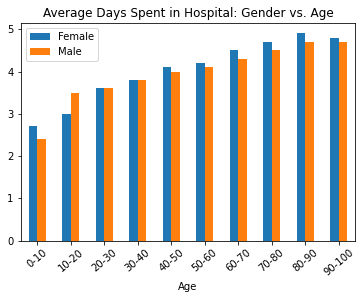

In [53]:
#Graphing the average number of days spent in the hospital, broken out by age and gender
gender_hospital_chart_df.plot.bar(x = 'Age', y = ['Female', 'Male'], rot = 40).set(title='Average Days Spent in Hospital: Gender vs. Age')

In [54]:
df.groupby("gender")["gender"].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

**Based on the above graph, it looks as if females who fall within the age group of 80-90 years old spent the most amount of days in the hospital (4.9 days on average). In terms of bias, I was expecting females to show higher number of days spent in the hospital for most age groups simply because there was more data captured for females (54,708) than males (47,055) in this dataset**

**Based on the above results, I want to take a look specifically at men vs. women in terms of average number of days spent in the hospital**

In [55]:
#Subsetting out the columns I need from original dataframe
gender_hospital = ['gender', 'time_in_hospital']
df[gender_hospital]
gender_hospital_df = df[gender_hospital]


In [56]:
#Checking to make sure I got the correct columns
print(gender_hospital_df)

        gender  time_in_hospital
0       Female                 1
1       Female                 3
2       Female                 2
3         Male                 2
4         Male                 1
...        ...               ...
101761    Male                 3
101762  Female                 5
101763    Male                 1
101764  Female                10
101765    Male                 6

[101766 rows x 2 columns]


In [57]:
#Grouping by gender, then finding the average number of days in the hospital for each group
gender_hospital_df.groupby('gender')["time_in_hospital"].mean()

gender
Female             4.478797
Male               4.299777
Unknown/Invalid    3.333333
Name: time_in_hospital, dtype: float64

In [58]:
#Assigning the group by output as its own variable
gender_hospital_chart = gender_hospital_df.groupby('gender')["time_in_hospital"].mean()

In [61]:
#Creating new dataframe of average days spent in the hospital broken out between genders
data = [['Male', 4.299777], ['Female', 4.478797]]
gender_hospital_chart = pd.DataFrame(data, columns=['Gender', 'Days'])
print(gender_hospital_chart)

   Gender      Days
0    Male  4.299777
1  Female  4.478797


**Despite there being more females than males within this dataset, when looking at the average time_in_hospital between the two, both genders spent around the same time in the hospital (around 4 days).**

[Text(0.5, 1.0, 'Average Days Spent in Hospital by Gender')]

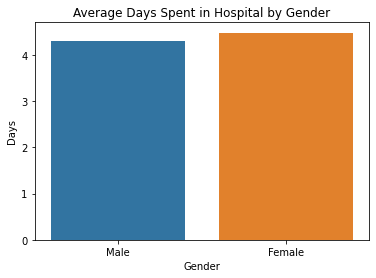

In [62]:
#Bar graph comparing the average number of days spent in the hospital for both men and women from this dataset
sns.barplot(x='Gender', y='Days', data = gender_hospital_chart).set(title='Average Days Spent in Hospital by Gender')

**In conclusion, data was captured for more females than males within this data set, therefore I would assume that females would have the highest number of days on average spent in the hospital. When looking at time_in_hospital between the two genders, within the various age groups, this was the case for the majority of groups. However those aged 10-20 saw more males average longer hospital stays, and ages 20-30 and 30-40 saw time spent in the hospital equal between males and females. And when looking at time_spent_in_hospital just between males and females, the average number of days spent in the hospital was basically the same (around 4 days.)**